In [17]:
import warnings
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import json
from pandas.io.json import json_normalize
from datetime import date, timedelta
   

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

In [6]:
def getdarkskydata(start,end,loc_name):
    """
    Input - start_date, end_d8ate, API KEY from https://darksky.net/dev/register
    Output - daily weather data from start date to end date
    """
    api_key = '03f7d7221972645470c7e8c6f35edd85'
    
    headers = {'User-Agent': 'Chrome/78and.0.3865.90'}
    http_proxy  = "http://10.245.5.249:8080"
    https_proxy = "https://10.245.5.249:8080"
    ftp_proxy   = "ftp://10.245.5.249:8080"

    proxyDict = { 
                "http"  : http_proxy, 
                "https" : https_proxy, 
                "ftp"   : ftp_proxy
                 }
    
    
    weather_data_hourly = pd.DataFrame()
    date_list = []
    
    # get month,year and day from start date
    start_date = dt.datetime.strptime(start, "%d-%m-%Y")
    start_month = start_date.month
    start_year = start_date.year
    start_day = start_date.day
    
    # get month,year and day from end date
    end_date = dt.datetime.strptime(end, "%d-%m-%Y")
    end_month = end_date.month
    end_year = end_date.year
    end_day = end_date.day
    
    # store all date from start date to end date in date list 
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)
    delta = timedelta(days=1)
    
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += delta
    
    # dictionary to store latitude and longitude for generation sites (solar,wind, precipitation)

    sites_latitude = {"Burbank":"34.1808"}

    sites_longitude = {"Burbank":"-118.309"}
    
    value1 = sites_latitude.get(loc_name)
    value2 = sites_longitude.get(loc_name)
    if(value1 == None and value2 == None):
        print('Unknown Location Name Used: %s',loc_name)
        print('\n')
        print('Use some Consumer Location or Generation Location Name.. .. ..')
        print('\n')
    else :
        for i in range(len(date_list)):
            #requesting web page
            date_format = '%Y-%m-%dT%H:%M:%S'
            dates = dt.datetime.strptime(date_list[i], '%Y-%m-%d').strftime(date_format)
            links = 'https://api.darksky.net/forecast/'+api_key+'/'+sites_latitude.get(loc_name)+','+sites_longitude.get(loc_name)+','+str(dates)+'-0800?exclude=currently,daily,alerts'
            print(links)
            response = requests.get(links,headers=headers,proxies=proxyDict)
            # converting into json
            weather = json.loads(response.content.decode('utf-8'))
            # getting it into data frame 
            weather_data = json_normalize(weather['hourly']['data'])
            weather_data_hourly = weather_data_hourly.append(weather_data,sort=True)
    
    weather_data_hourly.reset_index(drop=True, inplace=True)
    
    return weather_data_hourly

In [7]:
# call getdarkskydata to get forecasted data 
start_date = '01-07-2020'
end_date = '30-07-2020'
location = ['Burbank']

start_date = str(start_date)
end_date = str(end_date)

data = getdarkskydata(start_date,end_date,location[0])
  
# data treatment block
data['date_time'] = pd.to_datetime(data['time'],unit='s')
data['date_time']= data['date_time'].astype(str)

https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-01T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-02T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-03T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-04T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-05T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-06T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/34.1808,-118.309,2020-07-07T00:00:00-0800?exclude=currently,daily,alerts
https://api.darksky.net/for

In [9]:
#shift data from gmt to est time 
from datetime import datetime

def date_convert(date):
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    my_timestamp = date # some timestamp
    old_timezone = pytz.timezone("GMT")
    new_timezone = pytz.timezone("US/Eastern")
 
    # returns datetime in the new timezone
    my_timestamp_in_new_timezone = old_timezone.localize(my_timestamp).astimezone(new_timezone)
    return pd.to_datetime(my_timestamp_in_new_timezone)
  
import pytz
data['date_time'] = data.apply(lambda x: date_convert(x['date_time']),axis=1)
data['Date'] = data['date_time'].dt.date
data['Hour'] = data['date_time'].dt.hour

In [11]:
data.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date_time,Date,Hour
0,58.99,0.38,56.51,0.91,partly-cloudy-night,307.7,0.0,0.0,NaN,1012.4,Partly Cloudy,58.99,1593586800,0,10.0,130,3.19,1.97,2020-07-01 03:00:00-04:00,2020-07-01,3
1,58.46,0.40,56.23,0.92,partly-cloudy-night,308.0,0.0,0.0,NaN,1011.8,Partly Cloudy,58.46,1593590400,0,10.0,128,3.22,1.80,2020-07-01 04:00:00-04:00,2020-07-01,4
2,58.23,0.43,56.32,0.93,partly-cloudy-night,308.1,0.0,0.0,NaN,1011.5,Partly Cloudy,58.23,1593594000,0,10.0,142,3.23,1.86,2020-07-01 05:00:00-04:00,2020-07-01,5
3,57.88,0.47,56.36,0.95,partly-cloudy-night,307.6,0.0,0.0,NaN,1011.2,Partly Cloudy,57.88,1593597600,0,10.0,133,3.05,1.48,2020-07-01 06:00:00-04:00,2020-07-01,6
4,57.44,0.50,56.48,0.97,partly-cloudy-night,306.8,0.0,0.0,NaN,1011.1,Partly Cloudy,57.44,1593601200,0,10.0,123,3.36,1.70,2020-07-01 07:00:00-04:00,2020-07-01,7


In [12]:
data = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Blue_Sky/Burbank_July.csv')

In [13]:
data.columns

Index(['Date', 'Consumer_burbank_precip_actual_mean', 'Consumer_burbank_precip_f_mean'], dtype='object')

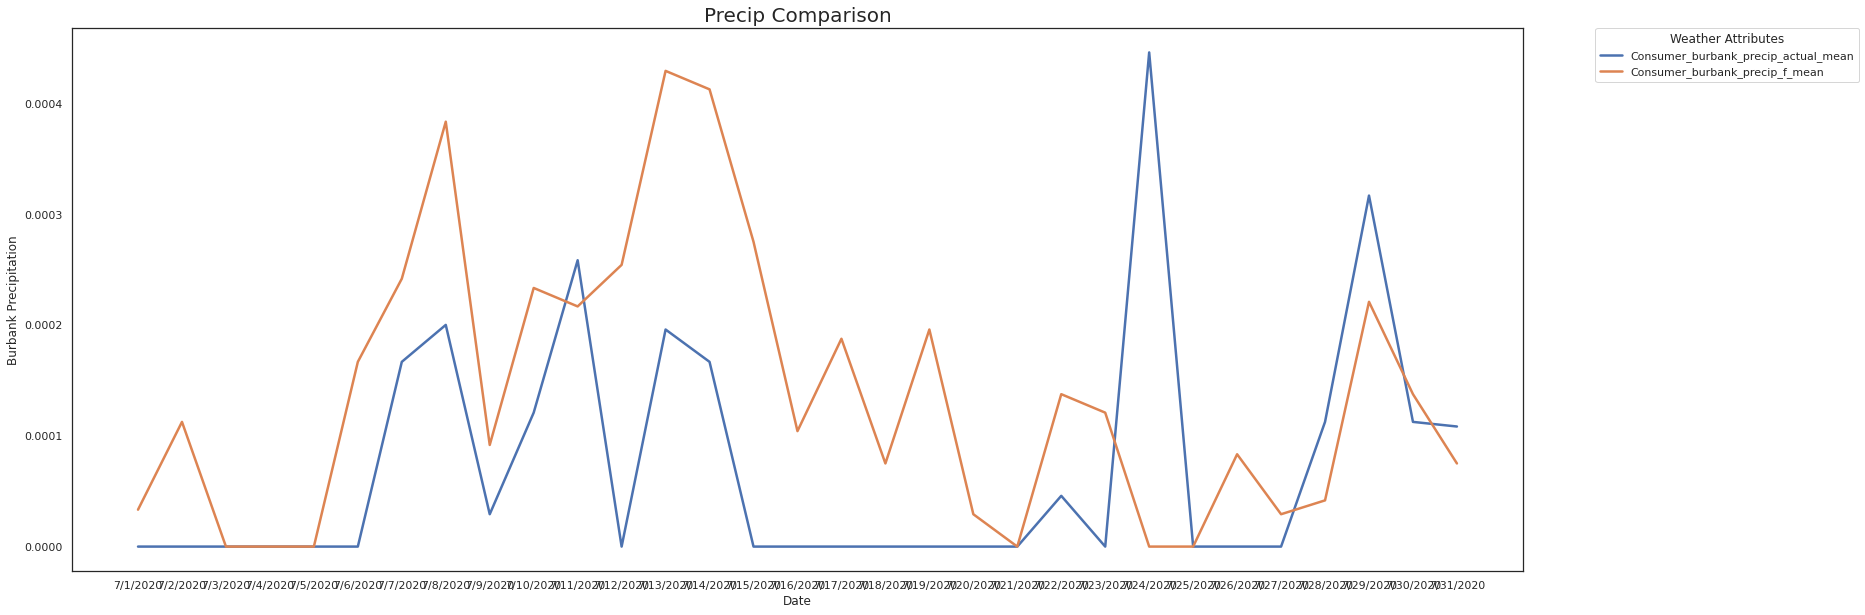

In [20]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("white")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(data[['Date', 'Consumer_burbank_precip_actual_mean', 'Consumer_burbank_precip_f_mean']], ['Date']))
    new_labels = ['Consumer_burbank_precip_actual_mean', 'Consumer_burbank_precip_f_mean']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Burbank Precipitation',title="Precip Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')